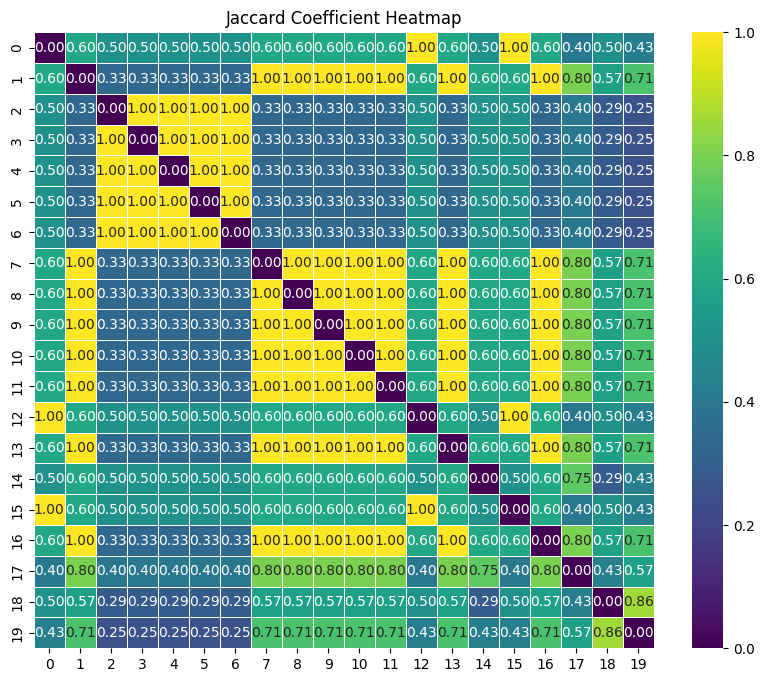

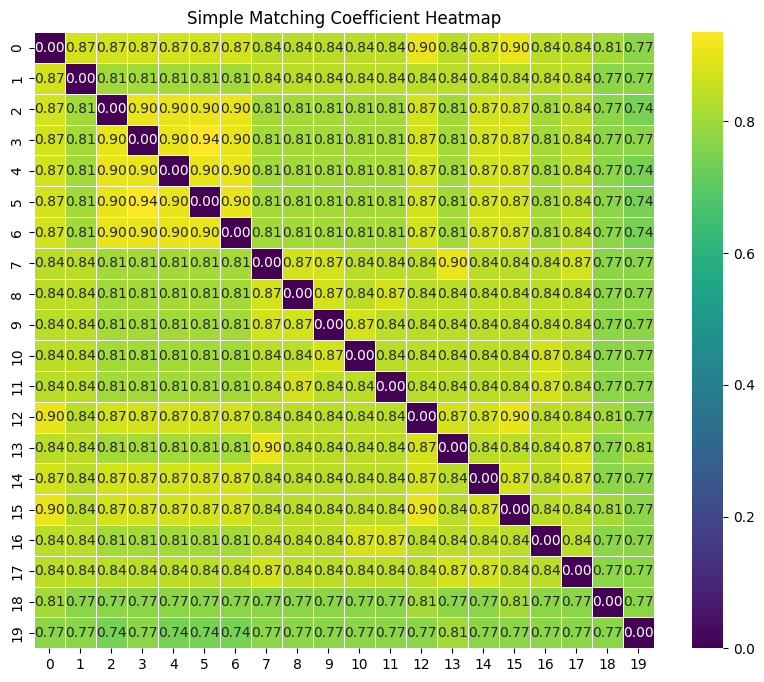

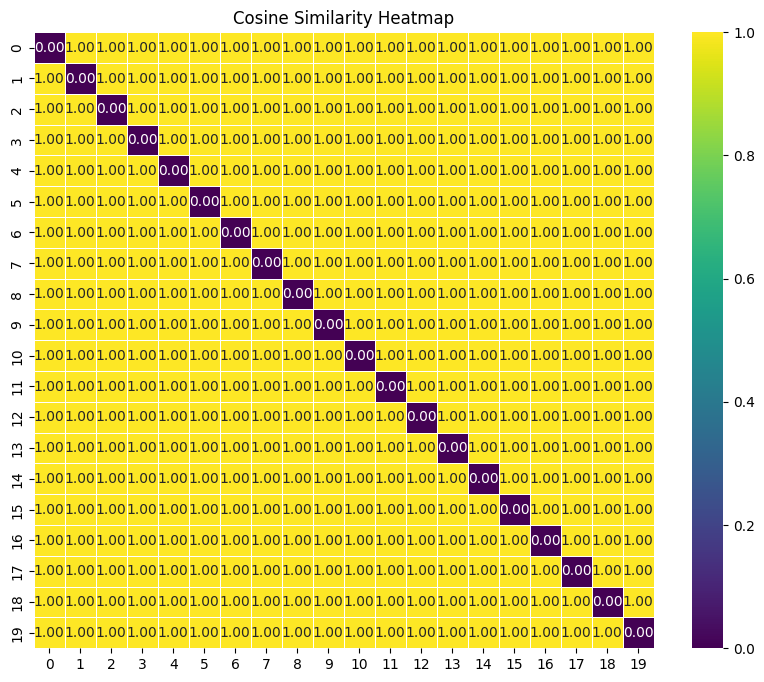

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def load_data(file_path, sheet_name):
    """Load data from an Excel sheet and return a DataFrame."""
    try:
        df = pd.read_excel(file_path, sheet_name=sheet_name)
        df = df.apply(pd.to_numeric, errors='coerce')
        if df.isnull().values.any():
            df = df.fillna(0)  # Fill missing values with 0 or another strategy
        return df
    except FileNotFoundError:
        raise FileNotFoundError(f"Error: The file at path '{file_path}' was not found.")
    except ValueError as ve:
        raise ValueError(f"Value Error: {ve}")
    except Exception as e:
        raise Exception(f"An error occurred: {e}")

def extract_vectors(df, indices):
    """Extract feature vectors for the given indices."""
    return df.iloc[indices].values

def jaccard_coefficient(a, b):
    """Calculate Jaccard Coefficient (JC) between two vectors."""
    intersection = np.logical_and(a, b).sum()
    union = np.logical_or(a, b).sum()
    return intersection / union if union != 0 else 0

def simple_matching_coefficient(a, b):
    """Calculate Simple Matching Coefficient (SMC) between two binary vectors."""
    matching = (a == b).sum()
    return matching / len(a) if len(a) > 0 else 0

def cosine_similarity(vector_a, vector_b):
    """Calculate the cosine similarity between two vectors."""
    dot_product = np.dot(vector_a, vector_b)
    norm_a = np.linalg.norm(vector_a)
    norm_b = np.linalg.norm(vector_b)
    return dot_product / (norm_a * norm_b) if norm_a > 0 and norm_b > 0 else float('nan')

def compute_similarities(vectors):
    """Compute JC, SMC, and COS matrices for all pairs of vectors."""
    num_vectors = vectors.shape[0]
    jc_matrix = np.zeros((num_vectors, num_vectors))
    smc_matrix = np.zeros((num_vectors, num_vectors))
    cos_matrix = np.zeros((num_vectors, num_vectors))

    for i in range(num_vectors):
        for j in range(num_vectors):
            if i != j:
                jc_matrix[i, j] = jaccard_coefficient(vectors[i], vectors[j])
                smc_matrix[i, j] = simple_matching_coefficient(vectors[i], vectors[j])
                cos_matrix[i, j] = cosine_similarity(vectors[i], vectors[j])

    return jc_matrix, smc_matrix, cos_matrix

def plot_heatmap(matrix, title):
    """Plot a heatmap of the similarity matrix."""
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
    plt.title(title)
    plt.show()

def main():
    file_path = '/content/Lab Session Data.xlsx'
    sheet_name = 'thyroid0387_UCI'
    num_observations = 20  # Number of observations to consider

    try:
        # Load the dataset
        df = load_data(file_path, sheet_name)

        # Extract the first 20 observation vectors
        vectors = extract_vectors(df, range(num_observations))

        # Compute similarities
        jc_matrix, smc_matrix, cos_matrix = compute_similarities(vectors)

        # Plot heatmaps
        plot_heatmap(jc_matrix, 'Jaccard Coefficient Heatmap')
        plot_heatmap(smc_matrix, 'Simple Matching Coefficient Heatmap')
        plot_heatmap(cos_matrix, 'Cosine Similarity Heatmap')

    except FileNotFoundError as e:
        print(e)
    except ValueError as ve:
        print(ve)
    except Exception as e:
        print(e)

if __name__ == "__main__":
    main()
